# Tensors

* Tensors are specialized data structures that are similar to arrays and matrices.

In [1]:
import torch
import numpy as np

## Directly from Data

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

## From Numpy Array

* When a tensor is created directly from a NumPy array, both share the same underlying memory location. This means that modifying the contents of one (either the NumPy array or the tensor) will reflect in the other.

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



## From Another Tensor

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3825, 0.3551],
        [0.4537, 0.9124]]) 



## With Random or Constant Values

In [5]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3714, 0.6878, 0.4040],
        [0.8650, 0.6712, 0.6861]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

In [6]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## MPS Availability

In [8]:
if torch.backends.mps.is_available():
  tensor = tensor.to('mps')

In [9]:
tensor.device

device(type='mps', index=0)

## Indexing and Slicing

In [10]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joining Tensor

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

## Arithmetic operations

In [12]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
print(f"y1: {y1}")
y2 = tensor.matmul(tensor.T)
print(f"y2: {y2}")
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
print(f"y3: {y3}")


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
print(f"z1: {z1}")
z2 = tensor.mul(tensor)
print(f"z2: {z2}")
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(f"z3: {z3}")

y1: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y2: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y3: tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
z1: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z2: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z3: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Single Element Tensor

In [13]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


## In Place Operations

In [14]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Tensor to Numpy Array

In [15]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [16]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


# Datasets and Dataloaders

## Loading Dataset

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

* root is the path where the train/test data is stored.
* train specifies training or test dataset.
* download=True downloads the data from the Internet if it's not available at root.
* transform and target_transform specify the feature and label transformations.

In [18]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [02:17<00:00, 191806.96it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 186135.89it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:24<00:00, 182339.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 871218.41it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Visualizing Dataset

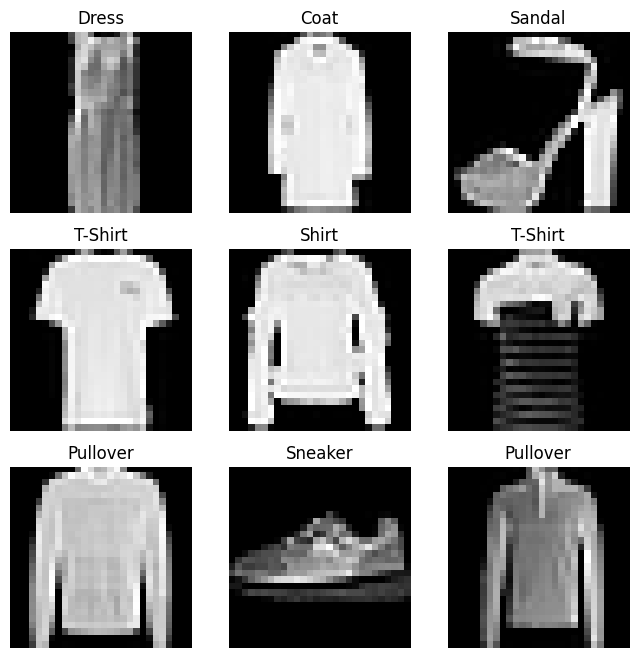

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing Training Data

* data: The training data we'll use to train the model, and the test data to evaluate the model.
* batch size: The number of records to be processed in each batch.
* shuffle: The random sample of the data by indices.

In [20]:
from torch.utils.data import DataLoader

In [21]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


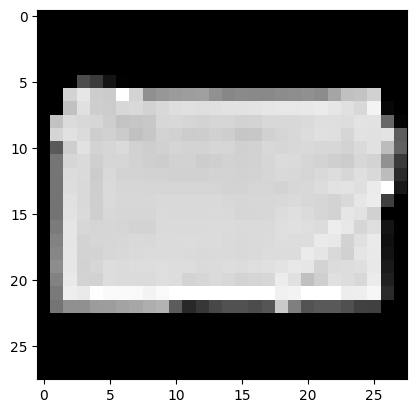

Label: Bag


In [22]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")

## Transformation

Transforms are used to manipulate data and prepare it for training. In PyTorch's TorchVision library, all datasets include two key parameters: transform (for modifying features) and target_transform (for modifying labels). These parameters accept callables that define the transformation logic.

In [23]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [24]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

# Building Models

## Define Class

In [25]:
from torch import nn

* The input layer with 28x28 or 784 features/pixels.
* The first linear module takes the input 784 features and transforms it to a hidden layer with 512 features.
* The ReLU activation function will be applied in the transformation.
* The second linear module takes 512 features as input from the first hidden layer and transforms it to the next hidden layer with 512 features.
* The ReLU activation function will be applied in the transformation.
* The third linear module take 512 features as input from the second hidden layer and transforms those features to the output layer with 10, which is the number of classes.
* The ReLU activation function will be applied in the transformation.

In [26]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print('Using {} device'.format(device))

Using mps device


In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [28]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [29]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='mps:0')


## Weight and Biases

In [30]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")
print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[ 0.0102,  0.0016,  0.0197,  ...,  0.0343, -0.0204, -0.0353],
        [ 0.0109, -0.0159,  0.0169,  ...,  0.0183,  0.0277, -0.0128],
        [ 0.0143, -0.0213, -0.0200,  ...,  0.0030,  0.0356, -0.0185],
        ...,
        [-0.0007,  0.0354, -0.0300,  ...,  0.0323,  0.0327,  0.0321],
        [ 0.0195, -0.0153,  0.0173,  ...,  0.0259,  0.0009, -0.0342],
        [ 0.0327, -0.0345, -0.0004,  ...,  0.0043, -0.0147,  0.0090]],
       device='mps:0', requires_grad=True) 

First Linear biases: Parameter containing:
tensor([-5.3004e-03, -1.7104e-02, -2.1123e-02, -2.0188e-02, -1.1326e-02,
         1.0873e-02,  3.5702e-02,  3.3968e-02, -2.7796e-02, -7.4486e-03,
        -2.0755e-02,  2.3051e-02,  4.8806e-03,  1.8657e-02, -3.1216e-02,
        -1.5101e-02, -2.3973e-02, -2.5694e-02,  1.5950e-02, -5.9867e-03,
        -6.0845e-03, -2.6912e-02, -1.8191e-02,  2.1619e-02, -1.1859e-02,
        -1.1167e-02,  3.2029e-02,  1.6026e-02,  2.2725e-02, -2.2231e-

## Layers Breakdown

In [31]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [32]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [33]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [34]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2002, -0.2451, -0.2622, -0.2436, -0.1526, -0.0698,  0.7661, -0.2043,
         -0.5890,  0.0989,  0.1012,  0.2216, -0.0093, -0.7611, -0.0758,  0.5887,
         -0.3490, -0.1654,  0.2605,  0.2229],
        [ 0.3001, -0.0756,  0.1667, -0.5455, -0.0644,  0.0722,  0.8106, -0.5248,
         -0.4934,  0.2588, -0.4740,  0.3194,  0.1706, -0.2033, -0.3236,  0.5526,
         -0.0461, -0.3348,  0.3117,  0.3727],
        [ 0.2459, -0.0321,  0.0894, -0.5004, -0.3707, -0.6600,  0.4325, -0.5829,
         -0.0645,  0.2094,  0.0660,  0.4071,  0.2414, -0.5106, -0.1434,  0.3172,
         -0.2105, -0.3958,  0.1265,  0.2590]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2002, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7661, 0.0000, 0.0000,
         0.0989, 0.1012, 0.2216, 0.0000, 0.0000, 0.0000, 0.5887, 0.0000, 0.0000,
         0.2605, 0.2229],
        [0.3001, 0.0000, 0.1667, 0.0000, 0.0000, 0.0722, 0.8106, 0.0000, 0.0000,
         0.2588, 0.0000, 0.3194, 0.1706, 0.0000, 0.00

In [35]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [36]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [39]:
logits

tensor([[ 0.2296, -0.2267, -0.0740,  0.0535, -0.2042,  0.3551, -0.0840,  0.0565,
          0.1872, -0.2204],
        [ 0.3107, -0.0522, -0.0347,  0.0273, -0.3234,  0.3541,  0.0387,  0.0520,
          0.2230, -0.2811],
        [ 0.3183, -0.0492, -0.1185,  0.0208, -0.2328,  0.2276,  0.0333, -0.0567,
          0.3086, -0.2992]], grad_fn=<AddmmBackward0>)

In [40]:
pred_probab

tensor([[0.1225, 0.0777, 0.0905, 0.1028, 0.0794, 0.1389, 0.0896, 0.1031, 0.1175,
         0.0781],
        [0.1293, 0.0899, 0.0915, 0.0974, 0.0686, 0.1350, 0.0985, 0.0998, 0.1184,
         0.0715],
        [0.1326, 0.0918, 0.0857, 0.0985, 0.0764, 0.1211, 0.0997, 0.0912, 0.1314,
         0.0715]], grad_fn=<SoftmaxBackward0>)

## Model Parameters

In [41]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0102,  0.0016,  0.0197,  ...,  0.0343, -0.0204, -0.0353],
        [ 0.0109, -0.0159,  0.0169,  ...,  0.0183,  0.0277, -0.0128]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0053, -0.0171], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0014, -0.0176,  0.0154,  ..., -0.0127,  0.0351,  0.0098],
        [-0.0371,  0.0442, -0.0312,  ...,  0.0310,  0.0433, -0.0099]],
       device='mps:

# Automatic Differentiation

In [42]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Gradient Functions

In [43]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x177da8880>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x177da8880>


## Computing Gradients

In [44]:
print(w.grad)
print(b.grad)

None
None


In [45]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0657, 0.0011, 0.1606],
        [0.0657, 0.0011, 0.1606],
        [0.0657, 0.0011, 0.1606],
        [0.0657, 0.0011, 0.1606],
        [0.0657, 0.0011, 0.1606]])
tensor([0.0657, 0.0011, 0.1606])


## Disabling Gradient Tracking

In [46]:
z = torch.matmul(x, w)+b
z.requires_grad

True

In [47]:
with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

False


In [48]:
# Another way

z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## Tensor Gradients and Jacobian Products

In [49]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)

out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)

inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Optimization Loop

In [50]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

## Setting Hyperparameters

* Number of Epochs: The number times the entire training dataset is passed through the network.
* Batch Size: The number of data samples the model sees in each epoch. This iterates over the number of batches needed to complete an epoch.
* Learning Rate: The size of steps that the model matches as it searches for the best weights that will produce a higher model accuracy. Smaller values mean the model takes longer to find the best weights. Larger values might result in the model stepping over and missing the best weights, which yields unpredictable behavior during training.

In [51]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Train and Test Loops

* The Train Loop: Iterates over the training dataset and tries to converge to optimal parameters.
* The Validation/Test Loop: Iterates over the test dataset to check if model performance is improving.

<br>
<br>

Common loss functions include:

* nn.MSELoss: Mean Square Error, used for regression tasks.
* nn.NLLLoss: Negative Log Likelihood, used for classification.
* nn.CrossEntropyLoss: Combines nn.LogSoftmax and nn.NLLLoss.

<br>
<br>

Inside the training loop, optimization happens in three steps:

1. Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
2. Back-propagate the prediction loss with a call to loss.backwards(). PyTorch deposits the gradients of the loss with respect to each parameter.
3. Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

In [52]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [53]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306779  [    0/60000]
loss: 2.303441  [ 6400/60000]
loss: 2.288326  [12800/60000]
loss: 2.284169  [19200/60000]
loss: 2.285147  [25600/60000]
loss: 2.260109  [32000/60000]
loss: 2.264499  [38400/60000]
loss: 2.246955  [44800/60000]
loss: 2.232064  [51200/60000]
loss: 2.211804  [57600/60000]
Test Error: 
 Accuracy: 38.7%, Avg loss: 0.034943 

Epoch 2
-------------------------------
loss: 2.222986  [    0/60000]
loss: 2.240163  [ 6400/60000]
loss: 2.205508  [12800/60000]
loss: 2.212583  [19200/60000]
loss: 2.210191  [25600/60000]
loss: 2.155017  [32000/60000]
loss: 2.168262  [38400/60000]
loss: 2.134649  [44800/60000]
loss: 2.101915  [51200/60000]
loss: 2.075234  [57600/60000]
Test Error: 
 Accuracy: 42.2%, Avg loss: 0.033076 

Epoch 3
-------------------------------
loss: 2.096137  [    0/60000]
loss: 2.140226  [ 6400/60000]
loss: 2.073942  [12800/60000]
loss: 2.093557  [19200/60000]
loss: 2.093020  [25600/60000]
loss: 1.997472  [32000/600

## Save Model

In [54]:
torch.save(model.state_dict(), "model/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Loading and Running Predictions

In [55]:
import onnxruntime
import torch.onnx as onnx

In [56]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model/model.pth'))
model.eval()

/var/folders/7p/_l5kmmts4m3886n2ycnm87380000gn/T/ipykernel_8799/2223051616.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model/model.

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [58]:
input_image = torch.zeros((1,28,28))
onnx_model = 'model/model.onnx'
onnx.export(model, input_image, onnx_model)

In [59]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

In [60]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
